In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.express as px

In [ ]:
df = pd.read_csv('vgsales.csv')
df.head(5)

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37


Columns :
1.   Name : Nama Game nya
2.   Platform : platform rilisnya
3.   Year : tahun rilisnya
4.   Genre : Genre gamenya
5.   Publisher : Publishernya
6.   NA_Sales : Penjualan di North America (In Milions)
7.   EU_Sales : Penjualan di Europa (In Milions)
8.   JP_Sales : Penjualan di Jepang (In Milions)
9.   Other_sales : Penjualan di tempat lain selain di 6,7,8
10.  Global_sales : Total Penjualan, worldwide sales



In [ ]:
df = pd.read_csv('vgsales.csv')
df.head(5)

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

Conclusion :


*   Total datanya adalah 16.598
*   Ada beberapa missing data pada columns Yead, Publisher
*   Std : disini berbagai Sales standar deviasi ya pada kecil2, berarti nilainya gk jauh banget dengan mean





In [ ]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [144]:
Numerik = [Num for Num in df.columns if df[Num].dtype != 'O']
Numerik

['Rank',
 'Year',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales',
 'Total_Sales']

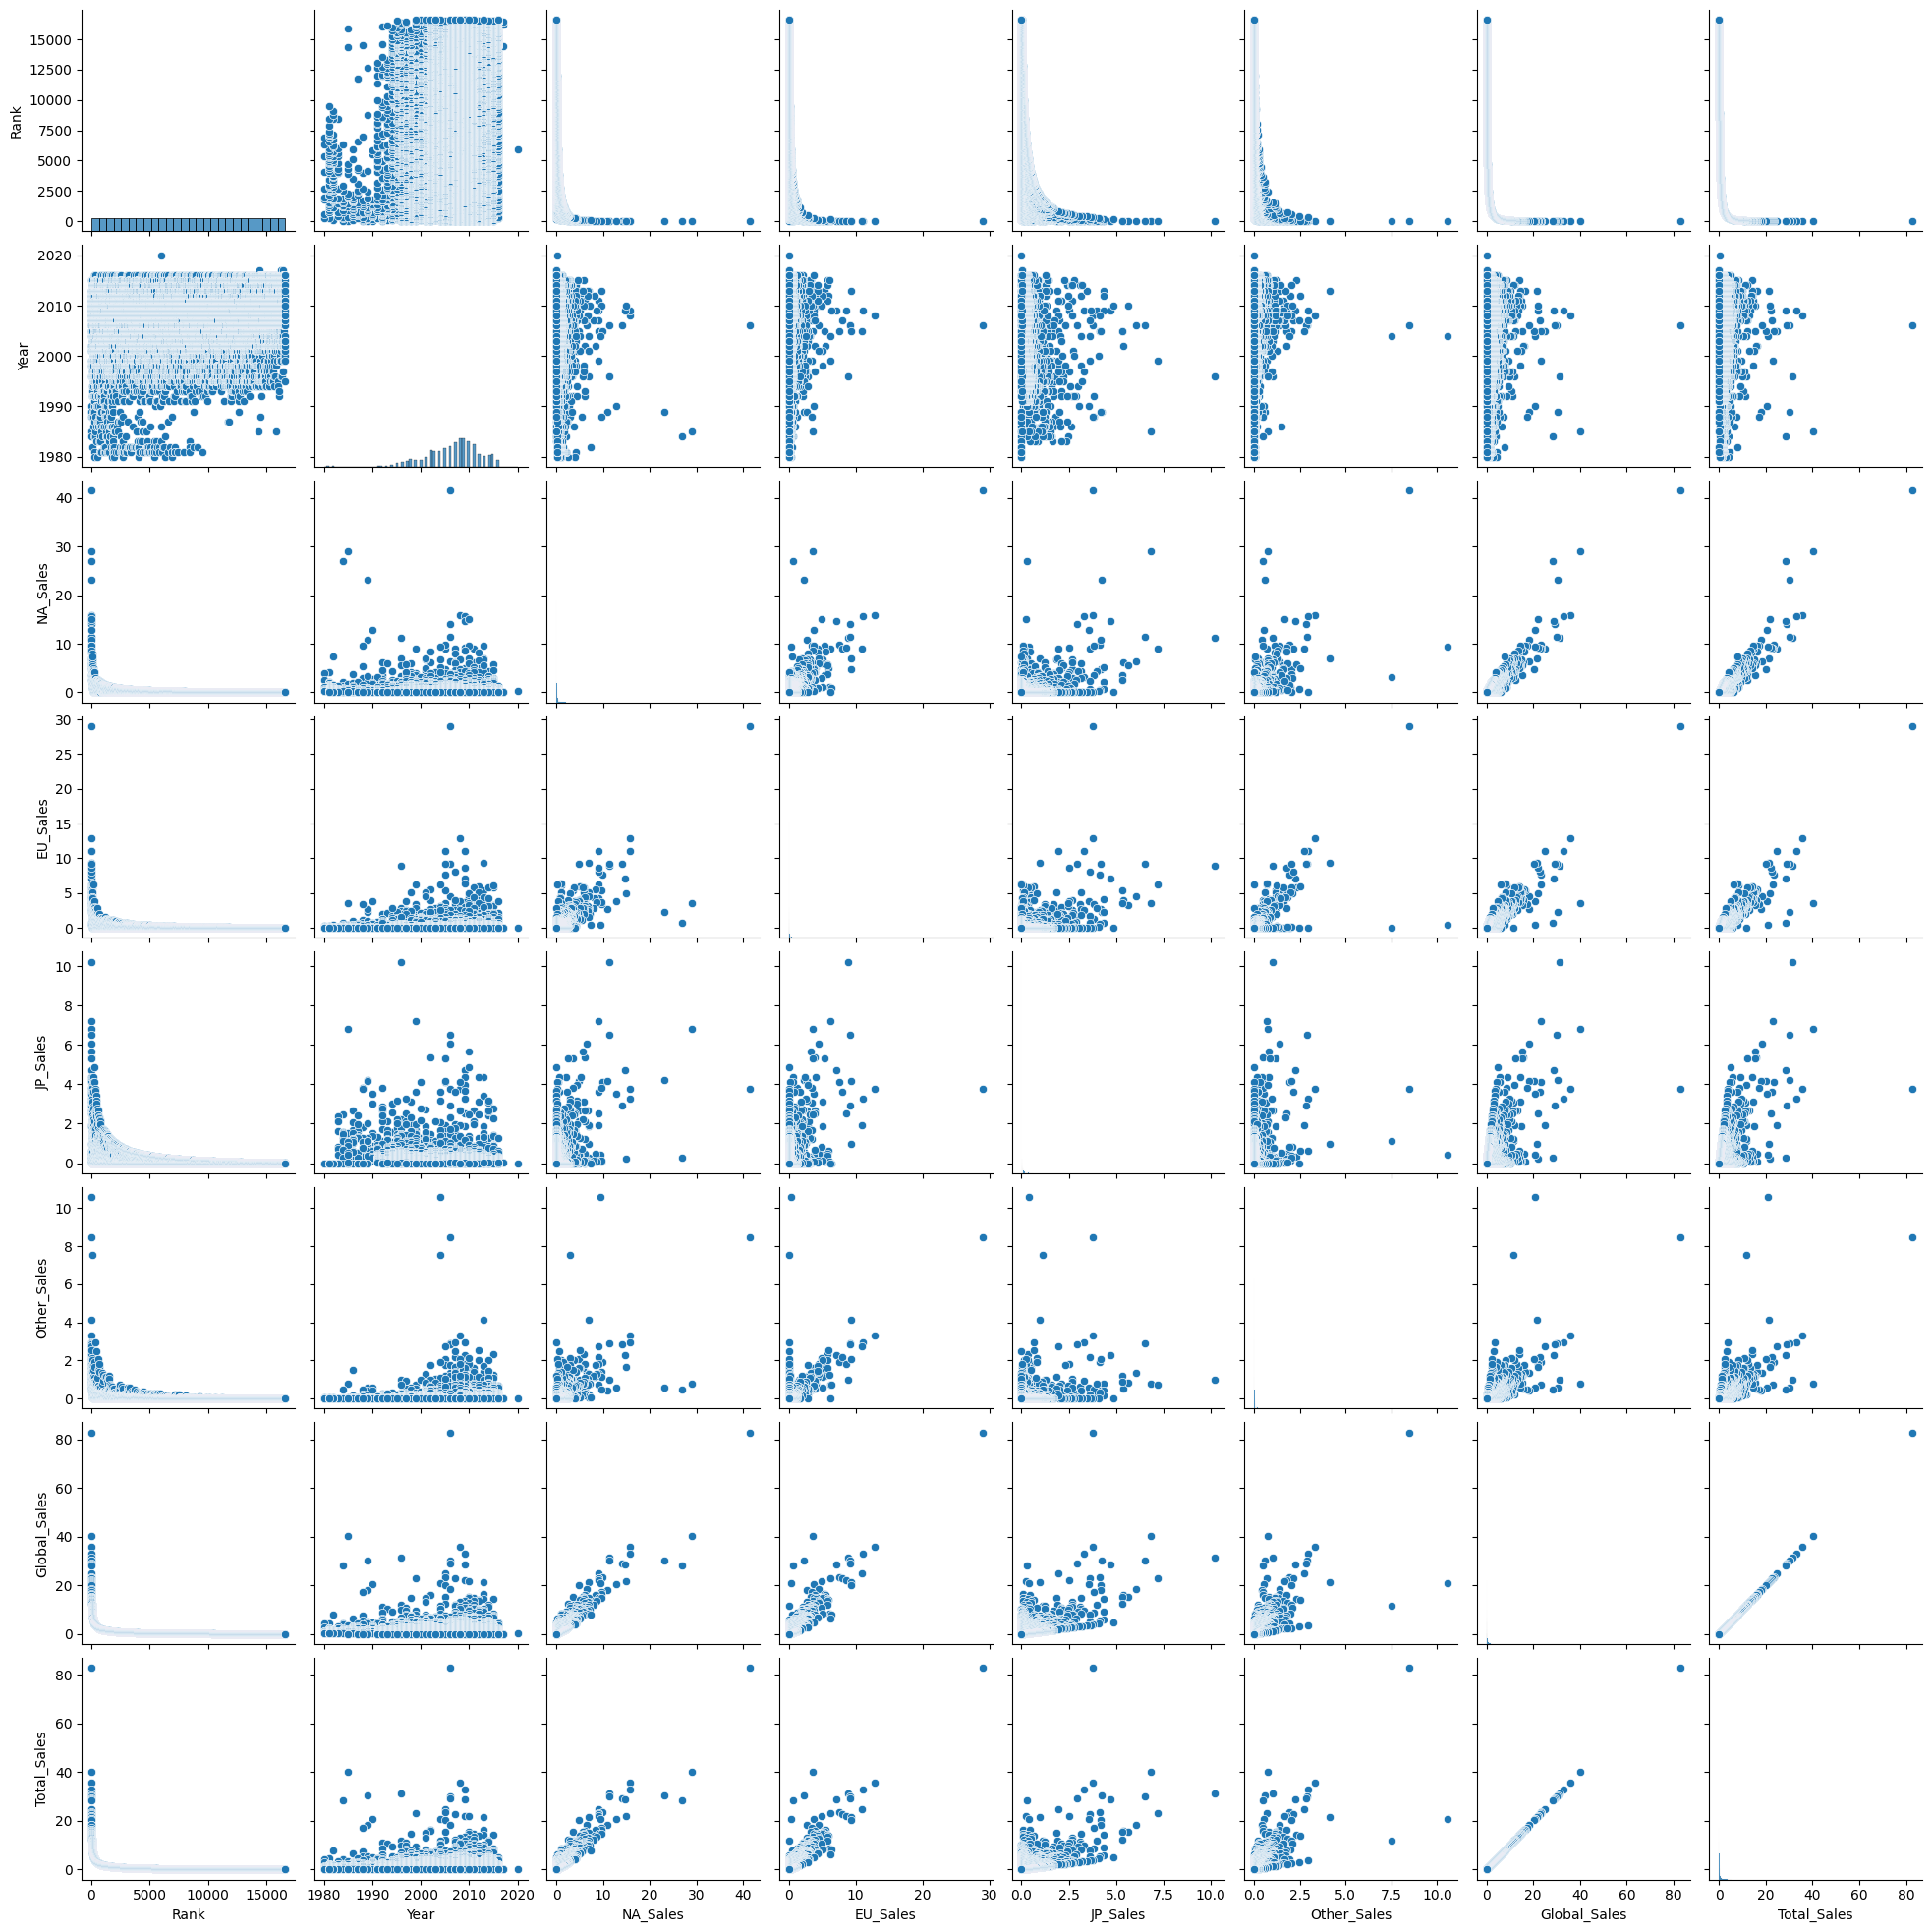

In [145]:
sns.pairplot(df[Numerik])

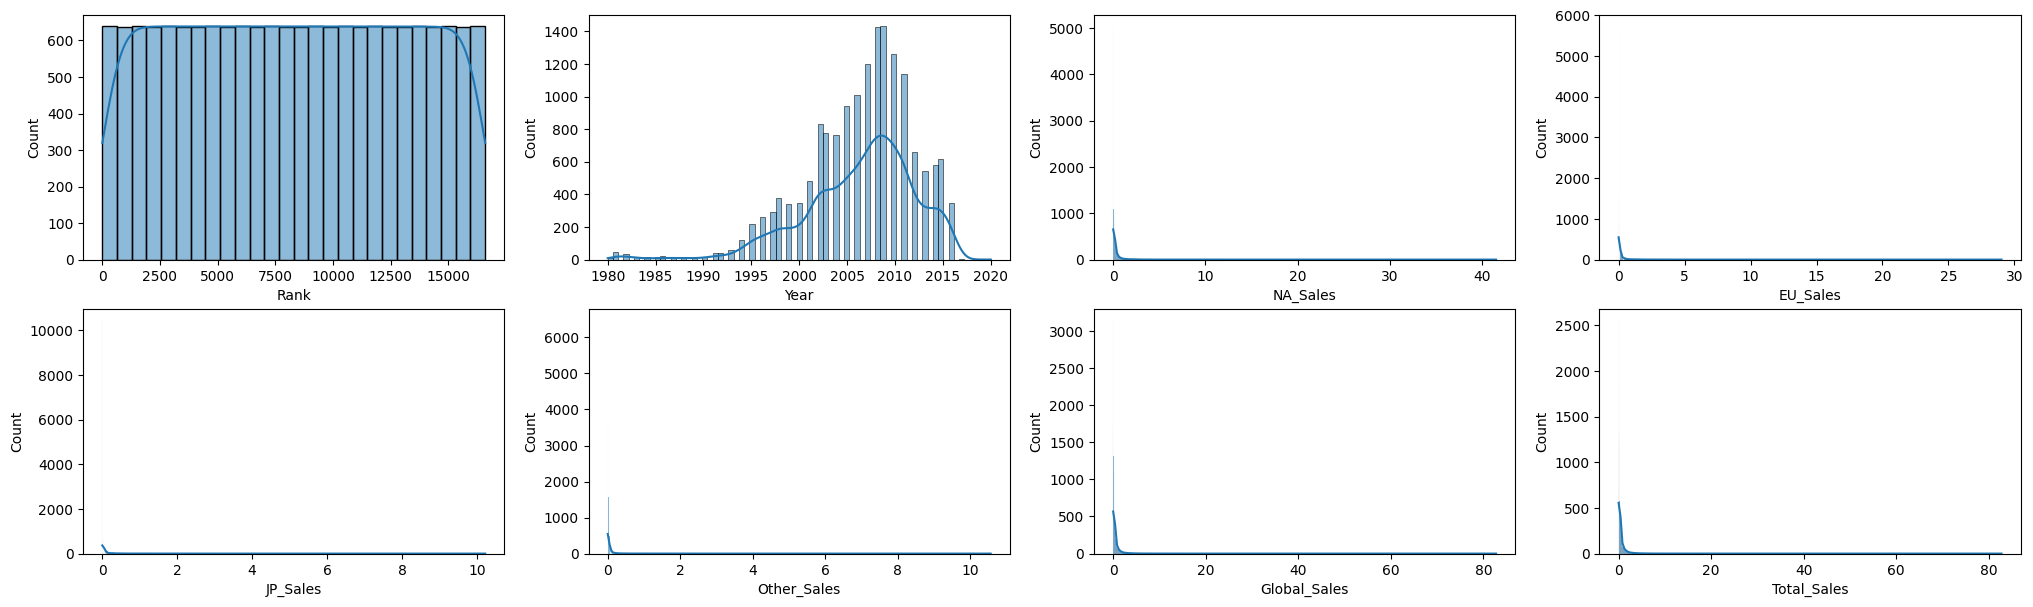

In [147]:
fig,ax = plt.subplots(2,4, figsize=(25,7))
for i,col in enumerate(Numerik):
  sns.histplot(df[col], kde=True, ax=ax[i//2, i%4])

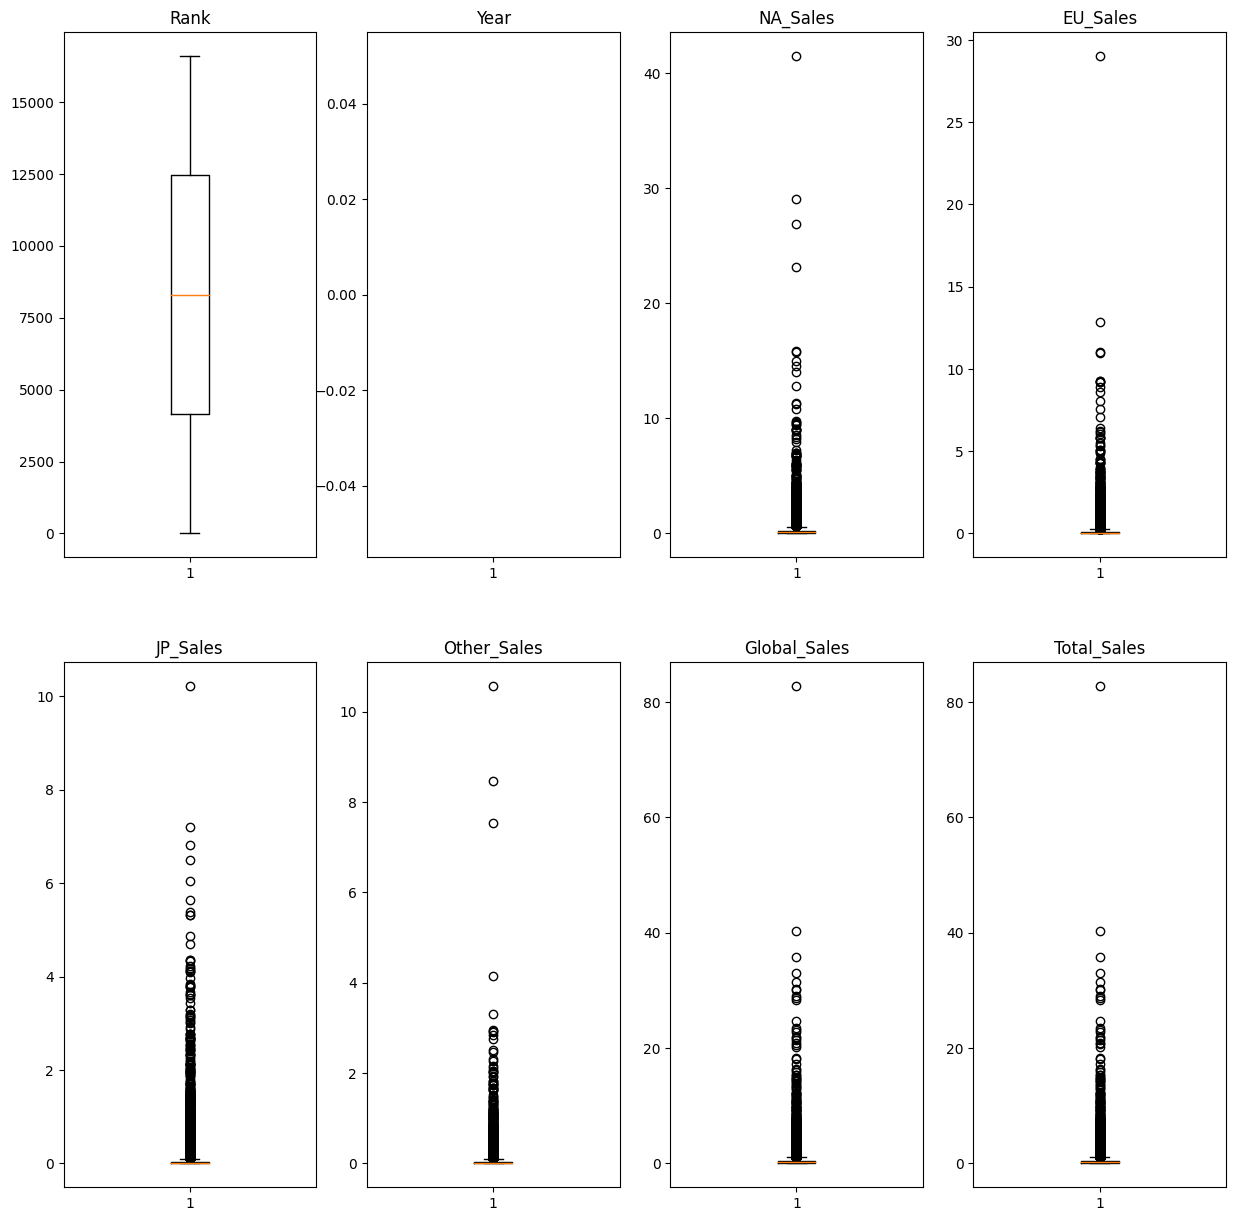

In [148]:
plt.figure(figsize=(15,15))
n = 0
for i in Numerik :
  n = n+1
  plt.subplot(2,4,n)
  plt.boxplot(df[i])
  plt.title(i)

Conclusion :



*   Distribusi data Year, rank terbilang normal
*   Distribusi sales lainnya sangat skewed
*   Pada boxplot terlihat ada banyak outlier



Text(0.5, 1.0, 'Correlation Heatmap')

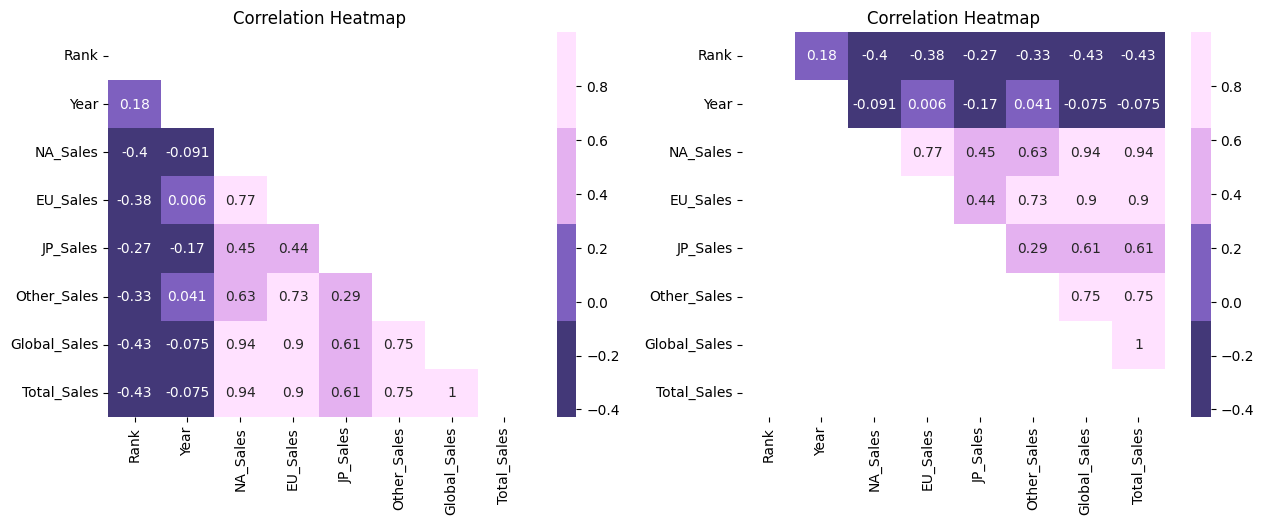

In [155]:
warna = ['#433878', '#7E60BF', '#E4B1F0', '#FFE1FF']
ut = np.triu(df[Numerik].corr())
lt = np.tril(df[Numerik].corr())

fig,ax = plt.subplots(1,2, figsize=(15,5))
plt.subplot(1,2,1)
sns.heatmap(df[Numerik].corr(), cmap=warna, annot=True, mask=ut, cbar='True')
plt.title('Correlation Heatmap')
plt.subplot(1,2,2)
sns.heatmap(df[Numerik].corr(), cmap=warna, annot=True, mask=lt, cbar='True')
plt.title('Correlation Heatmap')

Conclusion :
Seperti yang kita bisa liat ada beberapa corelation yang cukup kuat :
Rank : Global_sales, Total_sales, Other_sales, EU_sales, Jp_sales (Korelasi ya terbalik jadi ketika rank naik salesnya menurun, begitupun sebaliknya)
NA_Sales : Rank,EU_Sales, Jp_Sales, Other_sales, Global_Sales, Total_sales (Korelasinya positif)
Jp_Sales : Rank (korelasi negatif), NA_Sales, EU_Sales, Other_sales, Global_Sales, Total_sales (Korelasinya positif)
Other_sales : Rank (korelasi negatif), NA_Sales, EU_Sales, Jp_Sales, Global_Sales, Total_sales (Korelasinya positif)
Global_sales : Rank (korelasi negatif), NA_Sales, EU_Sales, Jp_Sales, Other_sales, Total_sales (Korelasinya positif)

# Genre

> Add blockquote



In [ ]:
df['Genre'].value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

In [ ]:
color = ['#433878', '#7E60BF', '#E4B1F0', '#FFE1FF']
fig = px.pie(df, 'Genre', title='Data Distribution Genre', color_discrete_sequence=color, template='plotly', height=500, width=500)
fig.show()

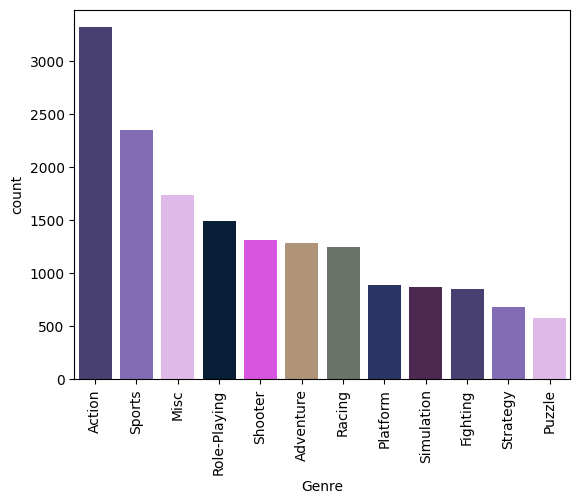

In [ ]:
color = ['#433878', '#7E60BF', '#E4B1F0', '#001F3F', '#ED3EF7', '#B99470', '#697565', '#1F316F', '#522258']
fig = sns.countplot(df, x='Genre', palette=color,order=df['Genre'].value_counts().index)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.show()

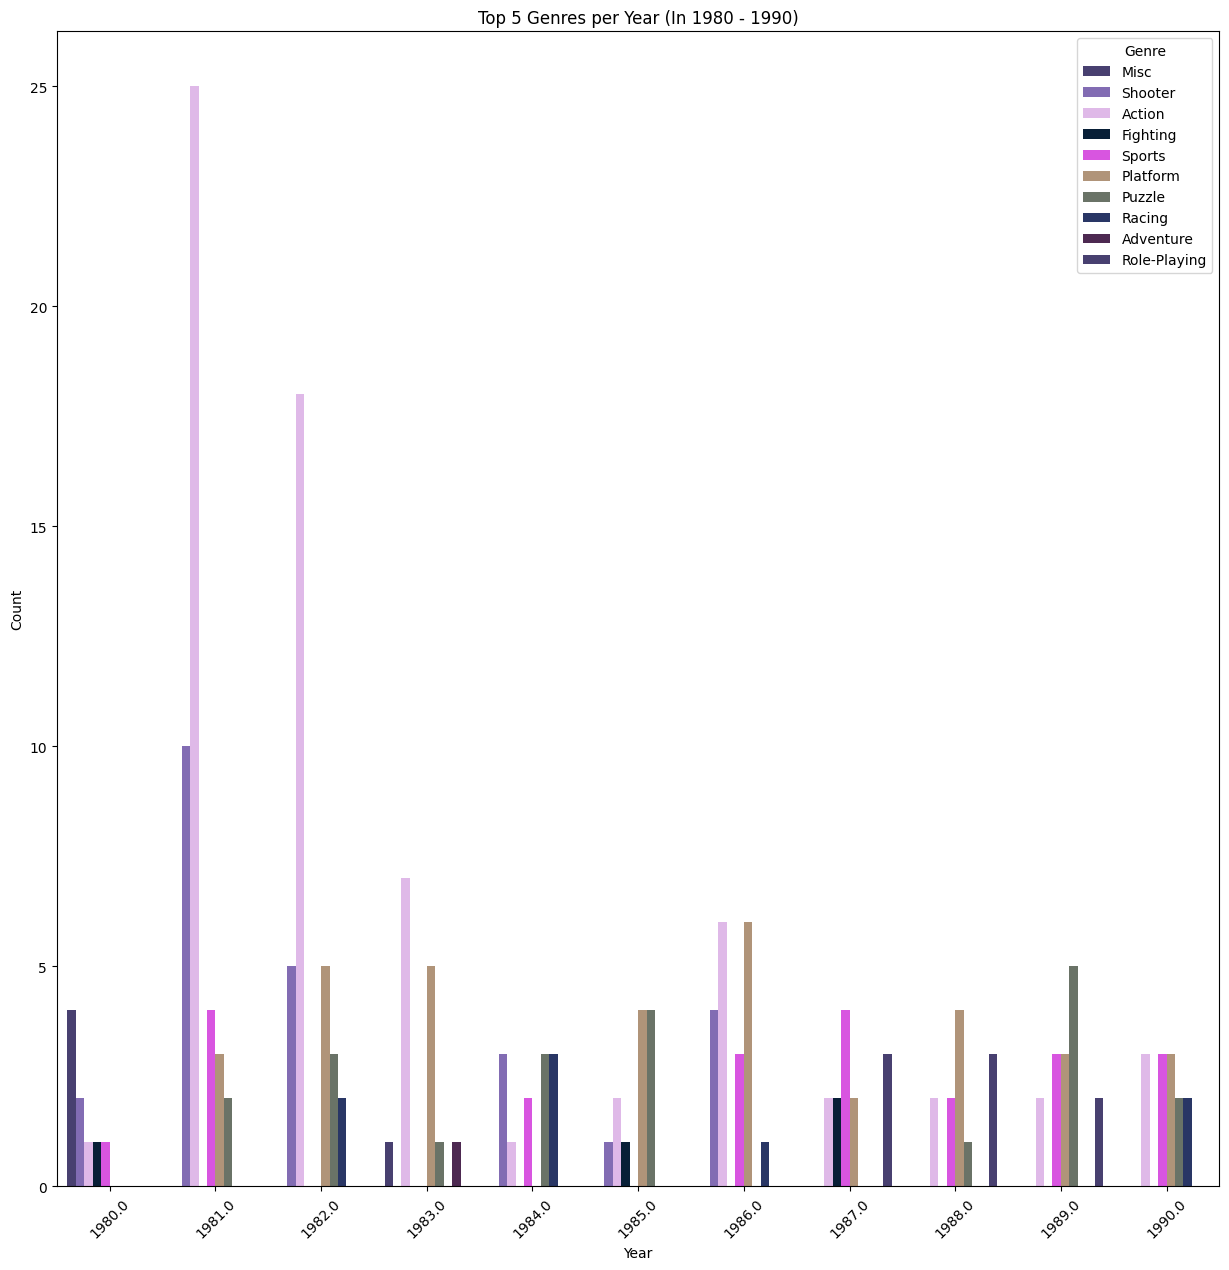

In [ ]:
df1 = df[df['Year'] <= 1990]
a = df1.groupby(['Year','Genre']).size().reset_index(name='Count')
b = a.groupby('Year').apply(lambda x: x.nlargest(5, 'Count'))
plt.figure(figsize=(15, 15))
sns.barplot(data=b, x='Year', y='Count', hue='Genre',palette=color)
plt.title('Top 5 Genres per Year (In 1980 - 1990)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
pd.set_option('display.max_rows', None)
df1.groupby('Year')['Genre'].value_counts()

Year    Genre       
1980.0  Misc             4
        Shooter          2
        Action           1
        Fighting         1
        Sports           1
1981.0  Action          25
        Shooter         10
        Sports           4
        Platform         3
        Puzzle           2
        Racing           1
        Simulation       1
1982.0  Action          18
        Platform         5
        Shooter          5
        Puzzle           3
        Racing           2
        Sports           2
        Misc             1
1983.0  Action           7
        Platform         5
        Adventure        1
        Misc             1
        Puzzle           1
        Shooter          1
        Sports           1
1984.0  Puzzle           3
        Racing           3
        Shooter          3
        Sports           2
        Action           1
        Misc             1
        Platform         1
1985.0  Platform         4
        Puzzle           4
        Action           2
        Fighting         1
        Shooter          1
        Simulation       1
        Sports           1
1986.0  Action           6
        Platform         6
        Shooter          4
        Sports           3
        Racing           1
        Role-Playing     1
1987.0  Sports           4
        Role-Playing     3
        Action           2
        Fighting         2
        Platform         2
        Shooter          2
        Adventure        1
1988.0  Platform         4
        Role-Playing     3
        Action           2
        Sports           2
        Puzzle           1
        Racing           1
        Shooter          1
        Simulation       1
1989.0  Puzzle           5
        Platform         3
        Sports           3
        Action           2
        Role-Playing     2
        Misc             1
        Shooter          1
1990.0  Action           3
        Platform         3
        Sports           3
        Puzzle           2
        Racing           2
        Role-Playing     2
        Simulation       1
Name: count, dtype: int64

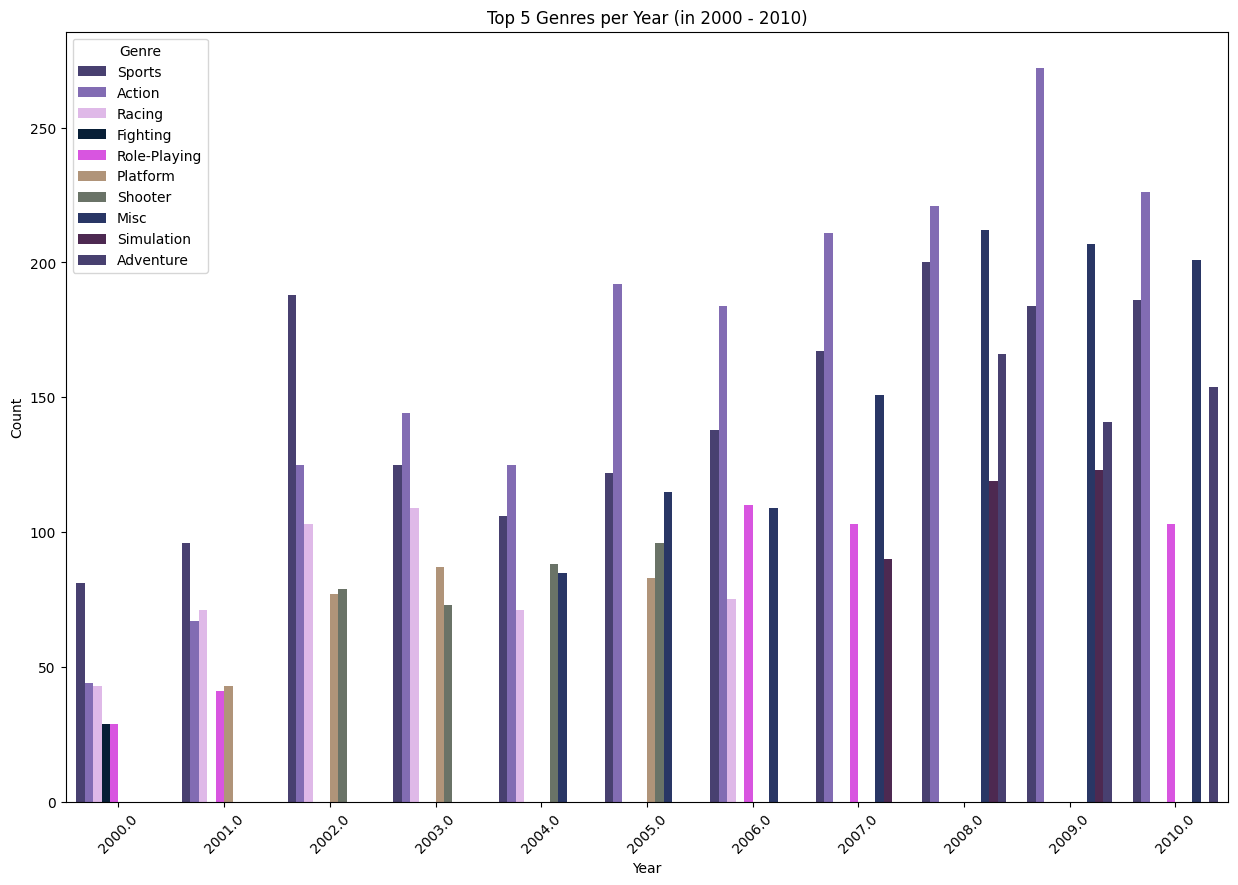

In [ ]:
df2 = df[(df['Year'] <= 2010) & (df['Year'] >= 2000)]
a = df2.groupby(['Year','Genre']).size().reset_index(name='Count')
b = a.groupby('Year').apply(lambda x: x.nlargest(5, 'Count'))
plt.figure(figsize=(15, 10))
sns.barplot(data=b, x='Year', y='Count', hue='Genre', palette=color)
plt.title('Top 5 Genres per Year (in 2000 - 2010)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
pd.set_option('display.max_rows', None)
df2.groupby('Year')['Genre'].value_counts()

Year    Genre       
2000.0  Sports           81
        Action           44
        Racing           43
        Fighting         29
        Role-Playing     29
        Platform         24
        Misc             20
        Shooter          20
        Adventure        16
        Strategy         16
        Simulation       15
        Puzzle           12
2001.0  Sports           96
        Racing           71
        Action           67
        Platform         43
        Role-Playing     41
        Shooter          36
        Simulation       28
        Misc             26
        Adventure        21
        Strategy         20
        Fighting         18
        Puzzle           15
2002.0  Sports          188
        Action          125
        Racing          103
        Shooter          79
        Platform         77
        Role-Playing     55
        Fighting         54
        Misc             45
        Adventure        42
        Strategy         22
        Puzzle           20
        Simulation       19
2003.0  Action          144
        Sports          125
        Racing          109
        Platform         87
        Shooter          73
        Misc             53
        Role-Playing     48
        Fighting         44
        Strategy         37
        Simulation       35
        Adventure        12
        Puzzle            8
2004.0  Action          125
        Sports          106
        Shooter          88
        Misc             85
        Racing           71
        Platform         66
        Role-Playing     60
        Adventure        39
        Fighting         39
        Strategy         32
        Simulation       27
        Puzzle           25
2005.0  Action          192
        Sports          122
        Misc            115
        Shooter          96
        Platform         83
        Racing           77
        Role-Playing     71
        Fighting         43
        Adventure        42
        Simulation       38
        Puzzle           33
        Strategy         29
2006.0  Action          184
        Sports          138
        Role-Playing    110
        Misc            109
        Racing           75
        Adventure        71
        Shooter          69
        Simulation       58
        Fighting         55
        Platform         54
        Puzzle           43
        Strategy         42
2007.0  Action          211
        Sports          167
        Misc            151
        Role-Playing    103
        Simulation       90
        Racing           86
        Shooter          85
        Adventure        84
        Strategy         67
        Puzzle           66
        Fighting         50
        Platform         42
2008.0  Action          221
        Misc            212
        Sports          200
        Adventure       166
        Simulation      119
        Role-Playing    112
        Shooter          83
        Racing           82
        Puzzle           64
        Platform         62
        Fighting         57
        Strategy         50
2009.0  Action          272
        Misc            207
        Sports          184
        Adventure       141
        Simulation      123
        Role-Playing    103
        Shooter          91
        Racing           84
        Puzzle           79
        Strategy         65
        Fighting         53
        Platform         29
2010.0  Action          226
        Misc            201
        Sports          186
        Adventure       154
        Role-Playing    103
        Simulation       82
        Shooter          81
        Racing           57
        Strategy         53
        Puzzle           45
        Fighting         40
        Platform         31
Name: count, dtype: int64

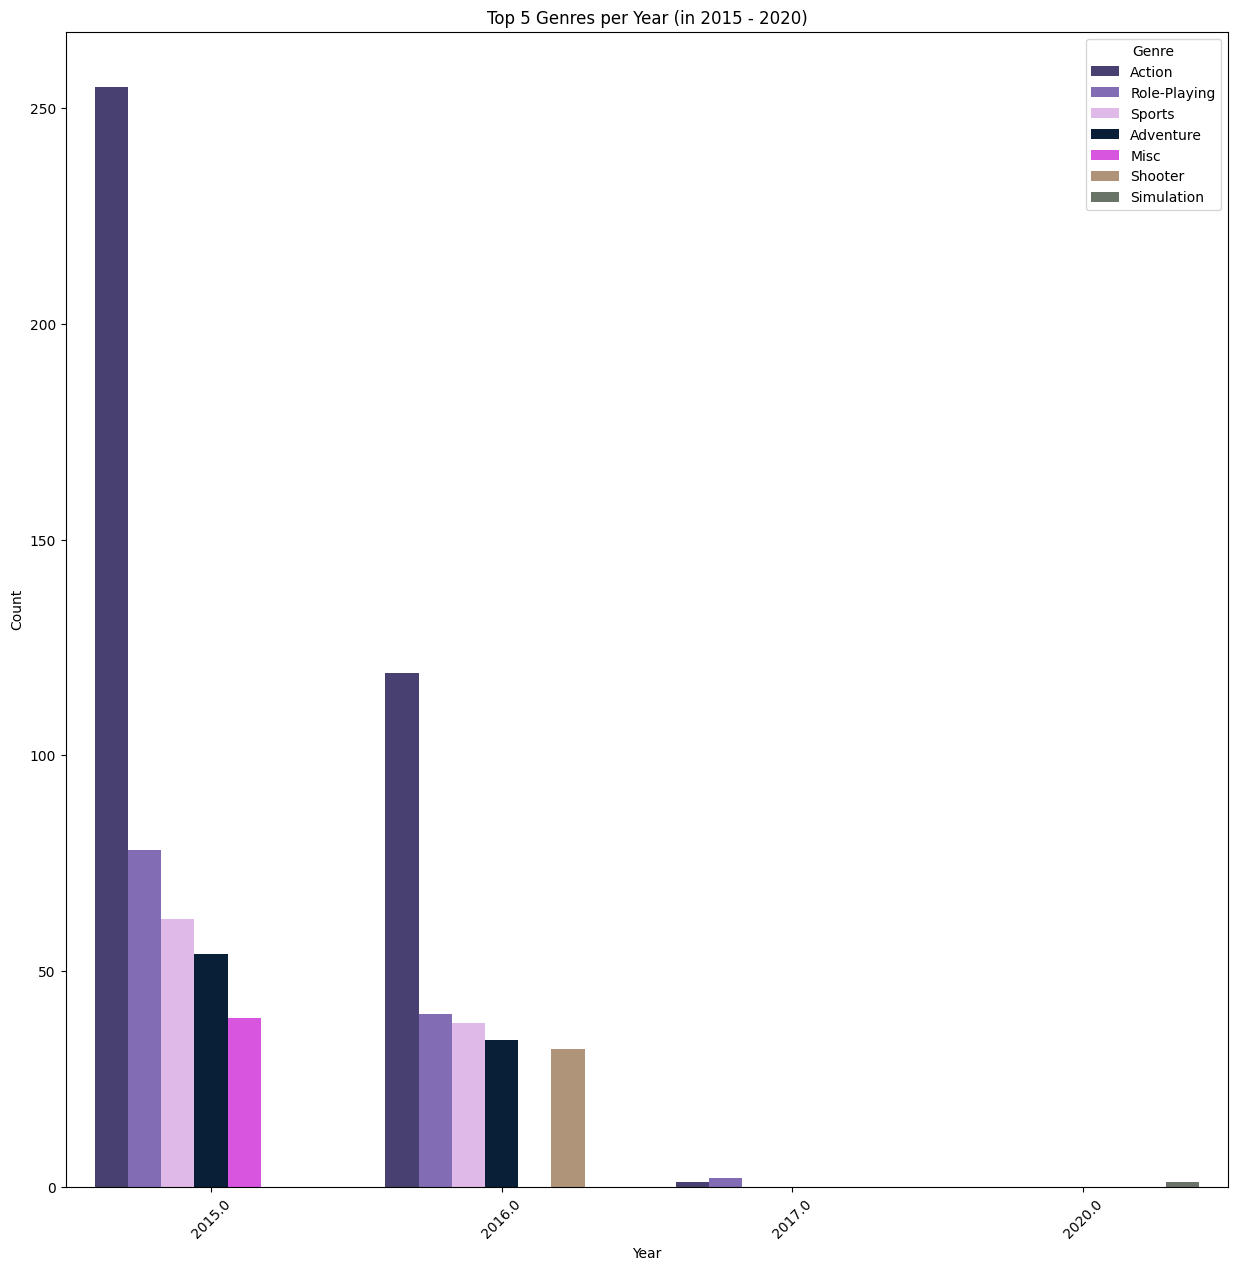

In [ ]:
df3 = df[df['Year'] >= 2015]
a = df3.groupby(['Year','Genre']).size().reset_index(name='Count')
b = a.groupby('Year').apply(lambda x: x.nlargest(5, 'Count'))
plt.figure(figsize=(15,15))
sns.barplot(b, x='Year', y='Count', hue='Genre', palette=color)
plt.title('Top 5 Genres per Year (in 2015 - 2020)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
pd.set_option('display.max_rows', None)
df3.groupby('Year')['Genre'].value_counts()

Year    Genre       
2015.0  Action          255
        Role-Playing     78
        Sports           62
        Adventure        54
        Misc             39
        Shooter          34
        Fighting         21
        Racing           19
        Strategy         17
        Simulation       15
        Platform         14
        Puzzle            6
2016.0  Action          119
        Role-Playing     40
        Sports           38
        Adventure        34
        Shooter          32
        Racing           20
        Misc             18
        Fighting         14
        Platform         10
        Strategy         10
        Simulation        9
2017.0  Role-Playing      2
        Action            1
2020.0  Simulation        1
Name: count, dtype: int64

Conclussion :

*   top 3 ganre game bertema : action, Sports, Misc
*   Dalam game lama (1980-1990) game bertema Action sangat diminati dan sangat banyak
*   Dalam tahun (2000 - 2010) game bertema Sports sangat banyak dimunculkan, disusul oleh action tentunya
*   Dalam tahun (2015-2020) game bertema action sangat sangat mendominasi





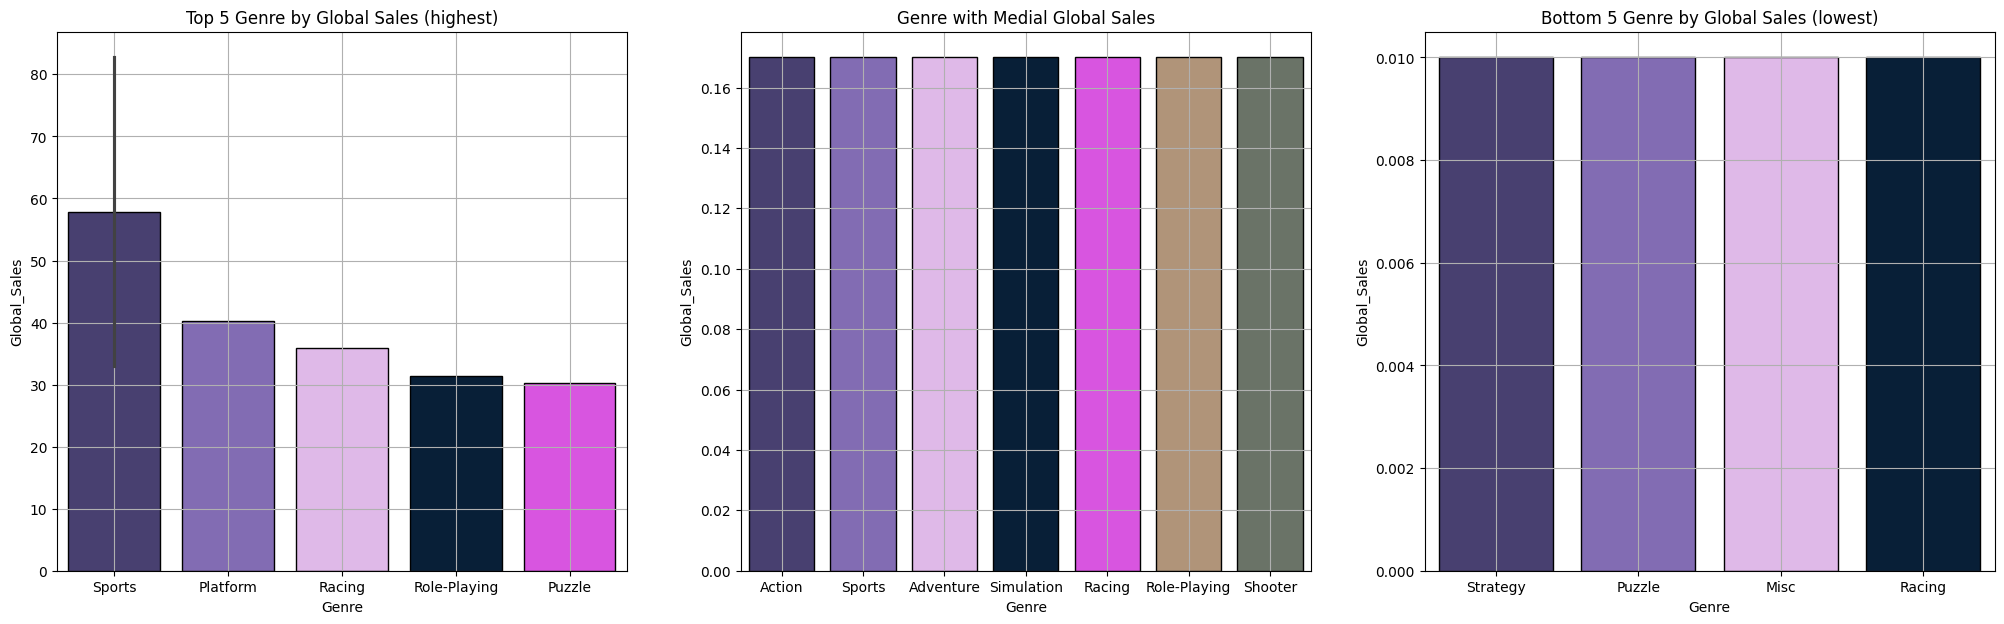

In [ ]:
fig = plt.subplots(1,3, figsize=(25,7))
plt.subplot(1,3,1)
sns.barplot(data = df.sort_values(ascending=False, by='Global_Sales').iloc[:6], x='Genre', y='Global_Sales', palette=color, edgecolor='black');
plt.title('Top 5 Genre by Global Sales (highest)')
plt.grid()

plt.subplot(1,3,2)
sns.barplot(data = df.sort_values(ascending=False, by='Global_Sales').iloc[8286:8300], x='Genre', y='Global_Sales', palette=color, edgecolor='black');
plt.title('Genre with Medial Global Sales')
plt.grid()

plt.subplot(1,3,3)
sns.barplot(data = df.sort_values(ascending=False, by='Global_Sales').iloc[16593:16597], x='Genre', y='Global_Sales', palette=color, edgecolor='black');
plt.title('Bottom 5 Genre by Global Sales (lowest)')
plt.grid()


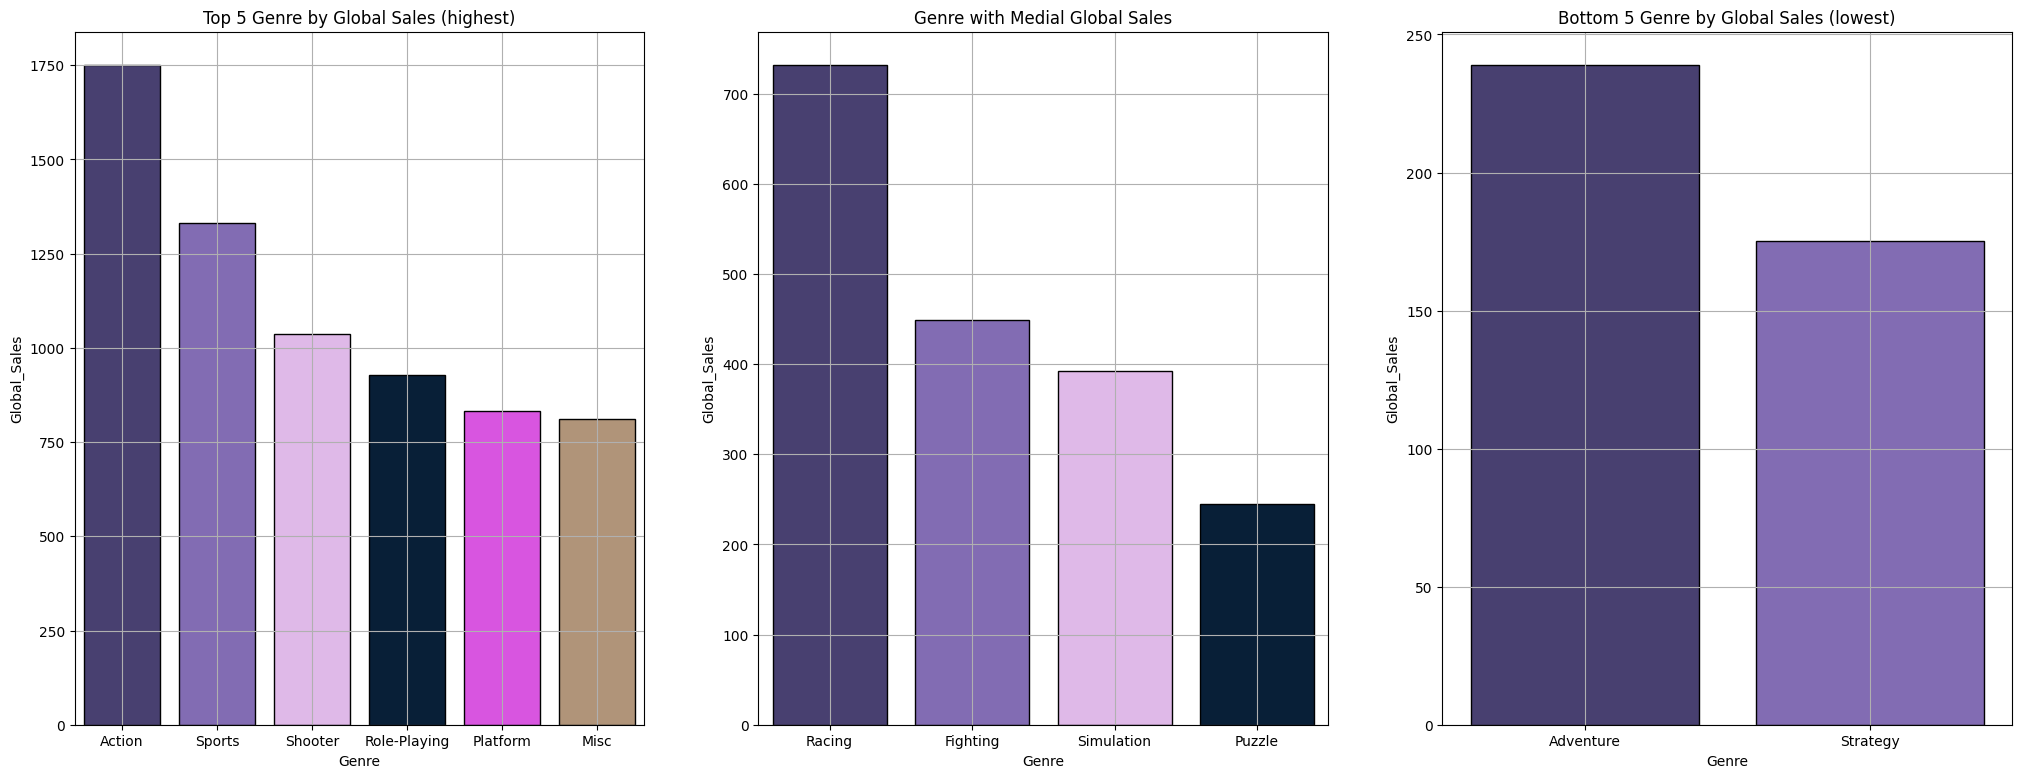

In [ ]:
df1 = df.groupby('Genre')['Global_Sales'].sum().reset_index()
fig = plt.subplots(1,3, figsize=(25,9))
plt.subplot(1,3,1)
sns.barplot(data = df1.sort_values(ascending=False, by='Global_Sales').iloc[:6], x='Genre', y='Global_Sales', edgecolor='black', palette=color);
plt.title('Top 5 Genre by Global Sales (highest)')
plt.grid()

plt.subplot(1,3,2)
sns.barplot(data = df1.sort_values(ascending=False, by='Global_Sales').iloc[6:10], x='Genre', y='Global_Sales', edgecolor='black', palette=color);
plt.title('Genre with Medial Global Sales')
plt.grid()

plt.subplot(1,3,3)
sns.barplot(data = df1.sort_values(ascending=False, by='Global_Sales').iloc[10:12], x='Genre', y='Global_Sales', edgecolor='black', palette=color);
plt.title('Bottom 5 Genre by Global Sales (lowest)')
plt.grid()

In [ ]:
df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64

  Penjualan game pada WorldWide Sales didominasi oleh game Action, Sports, dan Shooter, dan Adventure serta strategy sepertinya menjadi tema game yg tidak terlalu disukai

In [ ]:
#NA_Sales	EU_Sales	JP_Sales

df2 = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum().reset_index()
df2

Genre  NA_Sales  EU_Sales  JP_Sales
0         Action    877.83    525.00    159.95
1      Adventure    105.80     64.13     52.07
2       Fighting    223.59    101.32     87.35
3           Misc    410.24    215.98    107.76
4       Platform    447.05    201.63    130.77
5         Puzzle    123.78     50.78     57.31
6         Racing    359.42    238.39     56.69
7   Role-Playing    327.28    188.06    352.31
8        Shooter    582.60    313.27     38.28
9     Simulation    183.31    113.38     63.70
10        Sports    683.35    376.85    135.37
11      Strategy     68.70     45.34     49.46

Di Nort_America, EUROPA, dan Jepang, Penjualan game bertema action,sports,shooter, masih sangat diminati

In [ ]:
action = df[df['Genre'] == 'Action']
df2 = action.groupby('Name')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum().reset_index()
df2.sort_values(ascending=False, by='EU_Sales').head(5)

Name  NA_Sales  EU_Sales  JP_Sales
641               Grand Theft Auto V     23.46     23.04      1.39
482                   FIFA Soccer 13      2.64     10.25      0.23
640              Grand Theft Auto IV     11.53      7.65      0.58
645      Grand Theft Auto: Vice City      8.41      5.52      0.47
81   Assassin's Creed IV: Black Flag      6.17      5.18      0.20

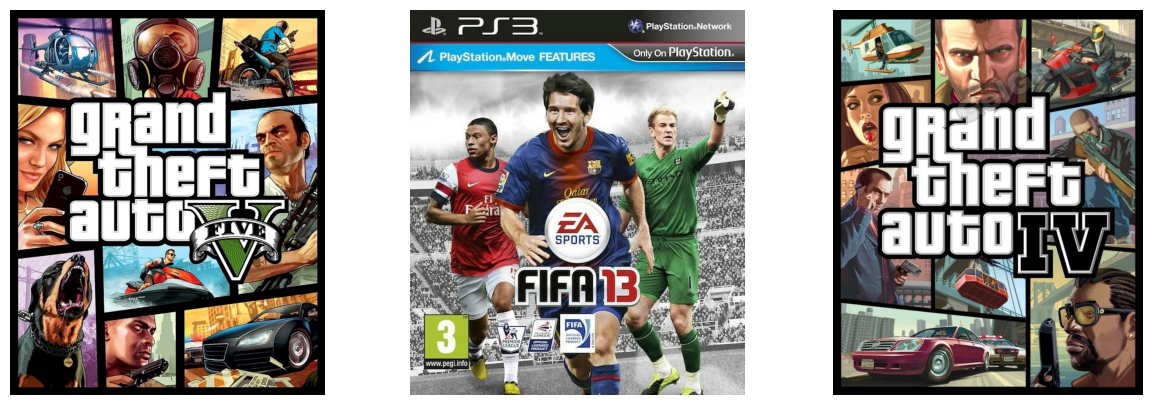

In [ ]:
from PIL import Image

img1 = Image.open('Grand Theft Auto V.jpeg')
img2 = Image.open('PS3 FIFA 13 Games.jpeg')
img3 = Image.open('GTA 4.jpeg')

fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].imshow(img1)
axes[0].axis('off')

axes[1].imshow(img2)
axes[1].axis('off')

axes[2].imshow(img3)
axes[2].axis('off')

plt.show()

3 Game yang penjualaannya cukup laris di EU

In [ ]:
df2.sort_values(ascending=False, by='NA_Sales').head(5)

Name  NA_Sales  EU_Sales  JP_Sales
641                 Grand Theft Auto V     23.46     23.04      1.39
640                Grand Theft Auto IV     11.53      7.65      0.58
644      Grand Theft Auto: San Andreas     10.77      1.96      0.41
894  LEGO Star Wars: The Complete Saga      9.10      5.01      0.00
645        Grand Theft Auto: Vice City      8.41      5.52      0.47

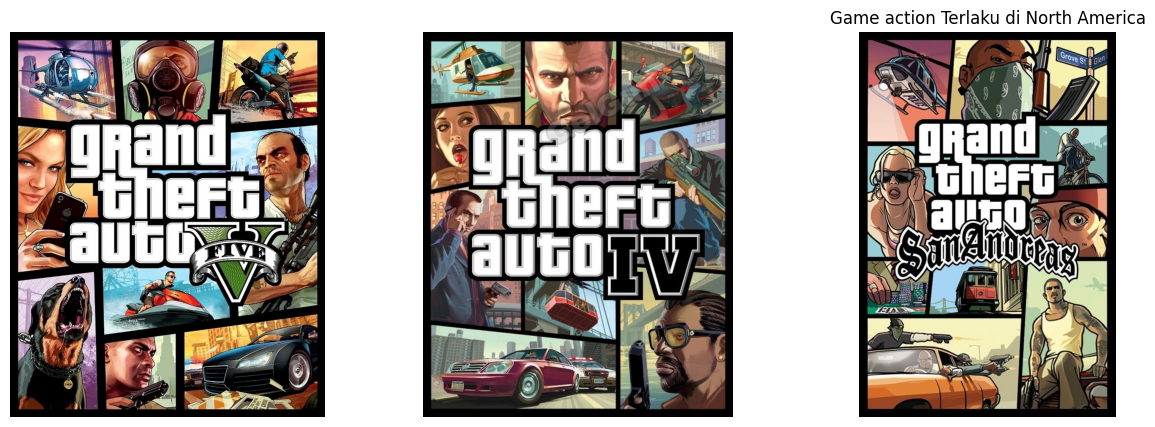

In [134]:
img1 = Image.open('Grand Theft Auto V.jpeg')
img3 = Image.open('GTA (GTA - Grand Theft Auto).jpeg')
img2 = Image.open('GTA 4.jpeg')

fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].imshow(img1)
axes[0].axis('off')

axes[1].imshow(img2)
axes[1].axis('off')

axes[2].imshow(img3)
axes[2].axis('off')

plt.title('Game action Terlaku di North America')
plt.show()

In [ ]:
df2.sort_values(ascending=False, by='JP_Sales').head(5)

Name  NA_Sales  EU_Sales  JP_Sales
1202  Pokemon HeartGold/Pokemon SoulSilver      4.40      2.77      3.96
1036                      Monster Hunter X      0.25      0.19      2.78
1899                   Yokai Watch Busters      0.00      0.00      2.28
1284                       Resident Evil 2      2.31      1.57      2.09
1668  The Legend of Zelda: Ocarina of Time      6.13      3.16      2.07

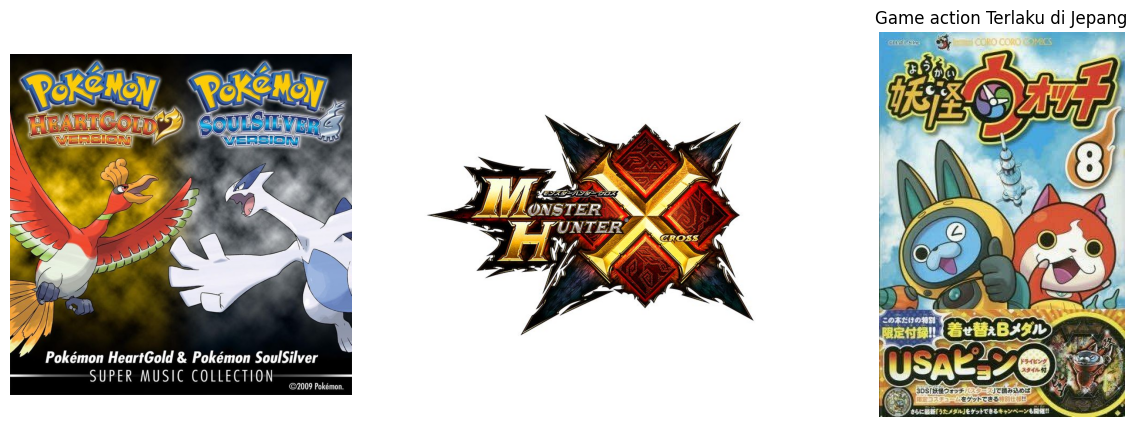

In [ ]:
img1 = Image.open('Pokémon Heart Gold Version Pokémon Soul Sliver Version Super Music Collection.jpeg')
img3 = Image.open('Yokai Watch 8 Limited Youkai B獎牌（第1捲全卷）.jpeg')
img2 = Image.open('6f7ac2cb-1035-455a-bebf-173eb8d1502b.jpeg')

fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].imshow(img1)
axes[0].axis('off')

axes[1].imshow(img2)
axes[1].axis('off')

axes[2].imshow(img3)
axes[2].axis('off')

plt.title('Game action Terlaku di Jepang')
plt.show()

In [ ]:
df3 = action.groupby('Name')['Global_Sales'].sum().reset_index()
df3.sort_values(ascending=False, by='Global_Sales').head(5)

Name  Global_Sales
641             Grand Theft Auto V         55.92
644  Grand Theft Auto: San Andreas         23.86
640            Grand Theft Auto IV         22.47
645    Grand Theft Auto: Vice City         16.19
482                 FIFA Soccer 13         16.16

In [ ]:
df['Total_Sales'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
df.groupby('Name')[['Global_Sales','Total_Sales']].sum().sort_values(ascending=False,by='Total_Sales').head(5)

Global_Sales  Total_Sales
Name                                         
Wii Sports                 82.74        82.74
Grand Theft Auto V         55.92        55.92
Super Mario Bros.          45.31        45.31
Tetris                     35.84        35.84
Mario Kart Wii             35.82        35.83

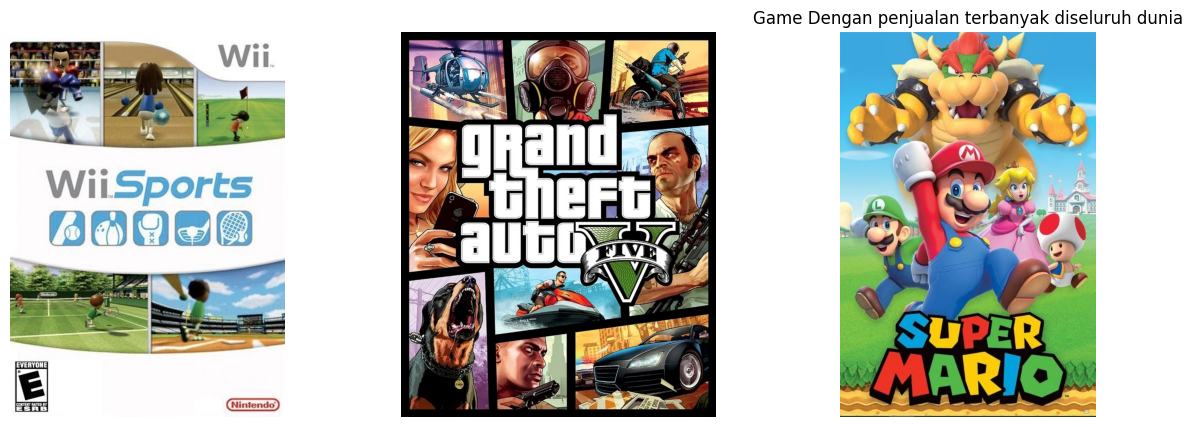

In [136]:
img1 = Image.open('Wii Sports design.jpeg')
img2 = Image.open('Grand Theft Auto V.jpeg')
img3 = Image.open('Super Mario Character Montage Poster 61x91_5cm.jpeg')

fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].imshow(img1)
axes[0].axis('off')

axes[1].imshow(img2)
axes[1].axis('off')

axes[2].imshow(img3)
axes[2].axis('off')

plt.title('Game Dengan penjualan terbanyak diseluruh dunia')
plt.show()

#Platform

In [138]:
df['Platform'].value_counts()

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [139]:
df1 = df.groupby('Platform')['Global_Sales'].sum().reset_index()
df1.sort_values(ascending=False, by='Global_Sales').head(5)

Platform  Global_Sales
16      PS2       1255.64
28     X360        979.96
17      PS3        957.84
26      Wii        926.71
4        DS        822.49

In [140]:
df2 = df.groupby('Platform')['NA_Sales'].sum().reset_index()
df2.sort_values(ascending=False, by='NA_Sales').head(5)

Platform  NA_Sales
28     X360    601.05
16      PS2    583.84
26      Wii    507.71
17      PS3    392.26
4        DS    390.71

In [141]:
df3 = df.groupby('Platform')['EU_Sales'].sum().reset_index()
df3.sort_values(ascending=False, by='EU_Sales').head(5)

Platform  EU_Sales
17      PS3    343.71
16      PS2    339.29
28     X360    280.58
26      Wii    268.38
15       PS    213.60

In [142]:
df4 = df.groupby('Platform')['JP_Sales'].sum().reset_index()
df4.sort_values(ascending=False, by='JP_Sales').head(5)

Platform  JP_Sales
4        DS    175.57
15       PS    139.82
16      PS2    139.20
23     SNES    116.55
11      NES     98.65